In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

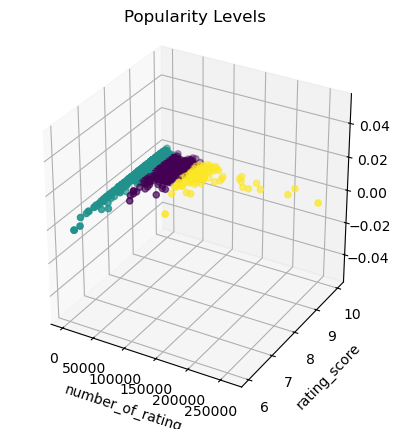

In [12]:
data = pd.read_csv("dataIQIYI-Copy1.csv")

# Chọn các đặc điểm để phân nhóm phim
features = data[['number_of_rating', 'rating_score']]

# Xác định số lượng nhóm muốn tạo
num_clusters = 3

# Sử dụng KMeans để phân nhóm phim
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(features)

# Gắn nhãn cho từng phim dựa trên phân nhóm của KMeans
labels = kmeans.labels_

def assign_label(row):
    if row['number_of_rating'] > 15000 and row['rating_score'] > 9.0:
        return 1
    elif row['number_of_rating'] > 10000 and row['rating_score'] > 8.0:
        return 0  
    else:
        return -1

data['Popularity Levels'] = data.apply(assign_label, axis=1)

# Vẽ biểu đồ phân nhóm 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('number_of_rating')
ax.set_ylabel('rating_score')
ax.set_title('Popularity Levels')

ax.scatter(data['number_of_rating'], data['rating_score'], c=labels, cmap='viridis')
ax.set_box_aspect([1,1,1])
plt.show()

In [11]:
print(data[['movie_title', 'number_of_rating', 'rating_score', 'Popularity Levels']])
data.to_csv("dataIQIYI-Copy1.csv", index=False)

                                  movie_title  number_of_rating  rating_score  \
0                    Mật Tình Thất Tâm Phần 1             14000           8.4   
1     【Lồng Tiếng】Cửa Hàng Tiện Lợi Saet Byul              1600           9.4   
2                           Sắc Xanh Lãng Mạn              4800           9.3   
3                       Quy Lộ (Đường Về Nhà)             56800           9.7   
4                            Đời Sống Ngục Tù              8900           9.6   
...                                       ...               ...           ...   
1606                       Chiến Cơ Cảnh Giới              2300           9.6   
1607                          Thám Tử Đã Chết              6100           9.6   
1608         Vua Bóng Chuyền Haikyuu - Phần 3             33500           9.4   
1609    Nghe Bảo Cô Định Tán Bố Con Tôi Mùa 4              6000           9.4   
1610                    Hội Trưởng Là Hầu Gái              4600           9.7   

      Popularity Levels  
0